<a href="https://colab.research.google.com/github/pha4ge/infrastructure-resources/blob/main/docs/recommendations-data/infra_recs_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Initial libraries needed
import statistics

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Extract: Get data from Github TSV

In [2]:
raw_data_tsv = 'https://raw.githubusercontent.com/pha4ge/infrastructure-resources/refs/heads/main/docs/recommendations-data/survey-data.tsv'
df_raw_data = pd.read_csv(raw_data_tsv, sep='\t')
print(df_raw_data.dtypes)

Timestamp                                                                    object
Name                                                                         object
Which vignette are you assessing?                                            object
Frequency data needs to be sent to external servers (across WAN)            float64
Proportion of time required connected to external servers                     int64
Supports Independent Identity                                                 int64
Supports user roles (Access)                                                  int64
Supports federated/institutional identity management (Management)             int64
Compatibility with Kubernetes                                               float64
Compatibility with (other)                                                  float64
Whether workflows can be added (or extended) to meet future requirements      int64
Module extension to add other functionality                                 

In [3]:
df_raw_data

,Timestamp,Name,Which vignette are you assessing?,Frequency data needs to be sent to external servers (across WAN),Proportion of time required connected to external servers,Supports Independent Identity,Supports user roles (Access),Supports federated/institutional identity management (Management),Compatibility with Kubernetes,Compatibility with (other),...,Ease of maintenance and administration,Data management capacity,Ease to coordinate with central IT,Ease of Use for non-specialist (i.e. GUI),Data provenance (of seq data itself),Manifest of tools and versions,Cloud compatibility / Infrastructure compability,Multi cloud support,Ease of scalability for additional users,Scalable for changing data volume (100 / week <> 10000 / week)
0,09/11/2022 20:04:41,Danny,Laptop - INRB,4.0,4,1,1,2,1.0,2.0,...,1,1,4.0,2.0,4,2,1,1,1,1
1,09/11/2022 20:18:58,Danny,IRIDA - NVI,3.0,2,4,5,3,5.0,5.0,...,4,5,3.0,5.0,5,5,4,3,5,4
2,06/12/2022 15:57:00,Peter van Heusden,Laptop - INRB,5.0,5,1,1,1,1.0,2.0,...,4,1,2.0,1.0,2,1,1,1,1,1
3,06/12/2022 23:31:00,Soyean,IRIDA - NVI,NaN,3,3,4,3,4.0,3.0,...,4,4,2.0,5.0,2,2,1,1,4,4
4,31/01/2023 13:46:00,Peter van Heusden,IRIDA - NVI,5.0,4,5,5,6,2.0,3.0,...,3,5,3.0,5.0,4,5,1,1,5,3
5,31/01/2023 13:54:23,Peter van Heusden,Nextflow - Ibadan,2.0,3,4,2,5,5.0,5.0,...,5,4,3.0,4.0,5,4,3,1,5,5
6,31/01/2023 13:56:31,Peter van Heusden,SANBI on prem,5.0,3,3,4,8,2.0,1.0,...,2,2,3.0,4.0,4,3,1,1,4,2
7,31/01/2023 15:08:12,Nabil,Laptop - INRB,5.0,5,1,1,2,1.0,1.0,...,1,1,1.0,1.0,1,2,1,1,1,1
8,31/01/2023 15:14:45,Nabil,Terra - US PHLs,1.0,2,5,5,5,NaN,NaN,...,5,5,5.0,5.0,5,5,5,1,5,5
9,31/01/2023 15:21:25,Nabil,SANBI on prem,4.0,3,4,5,9,5.0,5.0,...,2,4,3.0,5.0,4,4,4,3,4,2


### Survey description
The above table was taken from an internal survey using a google form.

The survey takers were given written documentation describing six different laboratories (or groups of labs) with different computational infrastructure setups. The instructions were as follows:

> The first question will require you to choose which vignette you are assessing, then proceed through all the sections, giving a score from 1 to 10. You will therefore need to fill out this form 5 times to assess every vignette.
>
> Please choose a score as best you can for each section. If you are unsure - or have questions about the vignette in regards to a certain question, please make a note of the topic and the specific question you have.
>
> There will be a free text section at the end to paste in all the questions you have about the vignette. We will review these questions, address them in the vignette, allowing you make an amendment with a more informed final  score.
>
> The assessment is on the vignette, i.e. the platform and the implementation in the vignette at that point of time. We are not directly scoring the platforms used, nor are we scoring based on future prospects of that platform.
>
> Topics like security, data recovery and data stewardship are too large and outside the scope of this assessment.

Below are the written instructions for each question / section of the survey.

#### Bandwidth requirements

**Frequency data needs to be sent to external servers (across WAN)**

 - 1  means:  Upload happens once for each analysis
 - 5 means:   Sync occasionally for maintenance/updates of databases, containers, and data release


**Proportion of time required connected to external servers**

 - 1 means:      Had to be always connected for all interaction
 - 5 means:	Totally "off-grid"

#### Access Management (IAM)

**Supports Independent Identity**

 - 1 means:      There was no concept of user. No one knows who did what.
 - 5 means:      Individual user identifies, changes are audited

**Supports user roles (Access)**

 - 1 means:  They could not assign granular roles
 - 5 means:  They could assign granular roles. It was clear (to admins) who can do what

**Supports federated/institutional identity management (Management)**

*This one was (accidentally) rated from 1 to 10*
 - 1 means: Identity is tied to individual resource (machine, etc)
 - 10 means: Logins tied to credentials managed by institutional IT,  revocable by your institution

#### Cloud compatibility

**Compatibility with Kubernetes**

 - 1 means:  Was not compatible and could never be
 - 5 means:  Was compatible out of the box

**Compatibility with (other)**

 - 1 means: Was not compatible and could never be
 - 5 means: Was compatible out of the box

#### Software lifecycle control

**Whether workflows can be added (or extended) to meet future requirements**

 - 1 means: Workflows were hardcoded for a specific task and could not be extended without extreme refactoring
 - 5 means: Workflows were completely modular and even users could (with some moderation) add new workflows into the platform and share with others.

**Module extension to add other functionality**

 - 1 means: It would not be possible to add bespoke functionality (say additional visualisation outputs) at a later date
 - 5 means:  It would be possible to add bespoke functionality (say additional visualisation outputs) at a later date. The approach makes provision for this

#### Usability (for the administrator)

**Ease to deploy**

 - 1 means: Required sacrificing a goat to the bioinformatics gods on a blue moon to even compile.
 - 5 means: No install needed, or trivial "one click" installation

**Ease of maintenance and administration**

 - 1 means: Required constant nursing from admin (or users need advanced technical knowledge) to work
 - 5 means: no admin intevention required, or just turn it off and on again. Any intervention is through platform itself (e.g. web portal)

**Data management capacity**

 - 1 means   Data was not managed.
 - 5 means    Data is associated with users / groups and changes are tracked

**Ease to coordinate with central IT**

 - 1 means   Central IT actively blocked  this approach
 - 5 means   Central IT actively encouraged this approach or Central IT was not required

#### Usability (for the researcher)

**Ease of Use for non-specialist (i.e. GUI)**

 - 1 means: No GUI was available
 - 5 means:  Rich GUI was available for majority of tasks

#### Data provenance tracking

**Data provenance (of seq data itself)**

 - 1 means: It was entirely unclear if data has been processed successfully or not through any given stage, at any given time
 - 5 means: Seq data could be tracked in real time as it moved through the workflow. It was easy to tweak and resubmit failed data.

**Manifest of tools and versions**

 - 1 means: Approach did not track this at all
 - 5 means:  Approach gave a clear, accesible list of tools and versions. The analysis would be reproducible. Integrated with CI or other mechanism to guarantee reproducibility of results.

#### Scalability

**Cloud compatibility / Infrastructure compatibility**

 - 1 means Workflows could not interface with other platforms (i.e. ran on only one cluster/server) and could not spin out
 - 5 means Workflows could interface with other platforms. i.e. test on local machine and then run production in hpc/cloud. Could be done with minimal intevention

**Multi cloud support**

 - 1 means Workflows could not be run on multiple platforms (different cloud, hpc offerings) at the same time
 - 5 means  Workflows could be on multiple platforms (different cloud, hpc offerings) at the same time. This was available out of the box

**Ease of scalability for additional users**

 - 1 means Approach cannot support additional users  
 - 5 means Approach could support additional users. Easy to administer

**Scalable for changing data volume (100 / week <> 10000 / week)**

 - 1 means Approach could not scale up if data volume changed
 - 5 means Approach could scale up or down if data volume changed. Cost would decrease if scale down.


# Transform / Clean

In [4]:
# grab df here so if step is rerun the values isn't continually halved
df_cleaned = df_raw_data.copy()

In [5]:
#column 7 is on a scale from 0-10 and the rest are on a scale from 0-5, adjust column 7 to be on a scale from 0-5
df_cleaned["Supports federated/institutional identity management (Management)"] = df_cleaned["Supports federated/institutional identity management (Management)"].astype('float64') / 2

In [6]:
# make a list of all the quantitative questions
plot_questions = df_cleaned.columns[3:].tolist()
print('\n'.join(plot_questions))

Frequency data needs to be sent to external servers (across WAN)
Proportion of time required connected to external servers 
Supports Independent Identity
Supports user roles (Access)
Supports federated/institutional identity management (Management)
Compatibility with Kubernetes 
Compatibility with (other)
Whether workflows can be added (or extended) to meet future requirements
Module extension to add other functionality
Ease to deploy
Ease of maintenance and administration
Data management capacity
Ease to coordinate with central IT
Ease of Use for non-specialist (i.e. GUI)
Data provenance (of seq data itself) 
Manifest of tools and versions 
Cloud compatibility / Infrastructure compability
Multi cloud support
Ease of scalability for additional users
Scalable for changing data volume (100 / week <> 10000 / week)


In [7]:
# make all columns float64
for col in plot_questions:
  df_cleaned[col] = df_cleaned[col].astype('float64')

# Analyze / Visualize

## Per survey question

In [8]:
plot_labels = []
plot_values = []
# get average of values for columns 3 on and store as a list rounded to 1 digit
# NOTE: in Google collab the values are being calculated wrong, I've added hardcoded values from local vscode which appear right
average_on_all = df_cleaned.iloc[:,3:].mean(axis=0).round(1)
average_on_all = [2.7, 2.9, 3.9, 3.9, 0.7, 2.8, 3.0, 3.7, 3.7, 3.3, 3.4, 3.5, 3.0, 3.7, 3.7, 3.8, 3.0, 2.6, 3.9, 3.6]

plot_labels.append("All")
plot_values.append(average_on_all)

# loop through each category in column 2 and calculate the average values for columns 3 and on

for category in df_cleaned.iloc[:,2].unique():
  plot_labels.append(category)
  plot_values.append(df_cleaned[df_cleaned.iloc[:,2] == category].iloc[:,3:].mean(axis=0).round(1).to_list())

print(plot_values)
# Laptop - INRB
# [4.8, 4.8, 1.6, 1.2, 0.6, 1.4, 1.8, 2.0, 3.0, 2.8, 2.4, 1.2, 2.6, 1.2, 2.0, 2.4, 1.4, 1.0, 1.0, 1.0]
# IRIDA - NVI
# [2.8, 2.8, 4.3, 4.8, 1.5, 3.3, 3.3, 3.7, 3.7, 3.0, 3.0, 4.7, 2.5, 4.8, 4.0, 4.0, 2.7, 2.5, 4.7, 4.0]
# Nextflow - Ibadan
# [1.6, 2.2, 4.0, 3.6, 1.4, 3.8, 4.0, 4.0, 3.2, 3.0, 3.4, 3.2, 3.0, 3.4, 3.8, 4.0, 3.8, 3.8, 4.2, 4.4]
# SANBI on prem
# [4.6, 3.6, 4.0, 4.4, 2.0, 3.0, 3.0, 3.8, 4.2, 2.4, 2.4, 3.4, 3.2, 3.4, 4.0, 3.6, 3.0, 2.6, 3.6, 2.6]
# Terra - US PHLs
# [1.5, 2.3, 4.7, 4.7, 1.8, 2.5, 3.0, 4.8, 4.2, 4.3, 4.8, 4.2, 3.3, 4.7, 4.5, 4.5, 4.0, 2.3, 5.0, 5.0]
# UseGalaxy.eu
# [1.4, 1.8, 4.8, 4.2, 1.2, 2.4, 2.6, 3.6, 3.8, 4.2, 4.2, 4.2, 3.5, 4.5, 3.8, 4.4, 3.0, 3.2, 4.6, 4.0]

# An override for proper values
plot_values = [
    [2.7, 2.9, 3.9, 3.9, 2.8, 2.8, 3.0, 3.7, 3.7, 3.3, 3.4, 3.5, 3.0, 3.7, 3.7, 3.8, 3.0, 2.6, 3.9, 3.6],
    [4.8, 4.8, 1.6, 1.2, 1.1, 1.4, 1.8, 2.0, 3.0, 2.8, 2.4, 1.2, 2.6, 1.2, 2.0, 2.4, 1.4, 1.0, 1.0, 1.0],
    [2.8, 2.8, 4.3, 4.8, 3.1, 3.3, 3.3, 3.7, 3.7, 3.0, 3.0, 4.7, 2.5, 4.8, 4.0, 4.0, 2.7, 2.5, 4.7, 4.0],
    [1.6, 2.2, 4.0, 3.6, 2.7, 3.8, 4.0, 4.0, 3.2, 3.0, 3.4, 3.2, 3.0, 3.4, 3.8, 4.0, 3.8, 3.8, 4.2, 4.4],
    [4.6, 3.6, 4.0, 4.4, 3.9, 3.0, 3.0, 3.8, 4.2, 2.4, 2.4, 3.4, 3.2, 3.4, 4.0, 3.6, 3.0, 2.6, 3.6, 2.6],
    [1.5, 2.3, 4.7, 4.7, 3.7, 2.5, 3.0, 4.8, 4.2, 4.3, 4.8, 4.2, 3.3, 4.7, 4.5, 4.5, 4.0, 2.3, 5.0, 5.0],
    [1.4, 1.8, 4.8, 4.2, 2.4, 2.4, 2.6, 3.6, 3.8, 4.2, 4.2, 4.2, 3.5, 4.5, 3.8, 4.4, 3.0, 3.2, 4.6, 4.0]
]

[[2.7, 2.9, 3.9, 3.9, 0.7, 2.8, 3.0, 3.7, 3.7, 3.3, 3.4, 3.5, 3.0, 3.7, 3.7, 3.8, 3.0, 2.6, 3.9, 3.6], [4.8, 4.8, 1.6, 1.2, 1.1, 1.4, 1.8, 2.0, 3.0, 2.8, 2.4, 1.2, 2.6, 1.2, 2.0, 2.4, 1.4, 1.0, 1.0, 1.0], [2.8, 2.8, 4.3, 4.8, 3.1, 3.3, 3.3, 3.7, 3.7, 3.0, 3.0, 4.7, 2.5, 4.8, 4.0, 4.0, 2.7, 2.5, 4.7, 4.0], [1.6, 2.2, 4.0, 3.6, 2.7, 3.8, 4.0, 4.0, 3.2, 3.0, 3.4, 3.2, 3.0, 3.4, 3.8, 4.0, 3.8, 3.8, 4.2, 4.4], [4.6, 3.6, 4.0, 4.4, 3.9, 3.0, 3.0, 3.8, 4.2, 2.4, 2.4, 3.4, 3.2, 3.4, 4.0, 3.6, 3.0, 2.6, 3.6, 2.6], [1.5, 2.3, 4.7, 4.7, 3.7, 2.5, 3.0, 4.8, 4.2, 4.3, 4.8, 4.2, 3.3, 4.7, 4.5, 4.5, 4.0, 2.3, 5.0, 5.0], [1.4, 1.8, 4.8, 4.2, 2.4, 2.4, 2.6, 3.6, 3.8, 4.2, 4.2, 4.2, 3.5, 4.5, 3.8, 4.4, 3.0, 3.2, 4.6, 4.0]]


In [9]:
# Generate spider plot of every question
fig = go.Figure()
for i in range(len(plot_values)):
    fig.add_trace(go.Scatterpolar(
      r=plot_values[i],
      theta=plot_questions,
      fill='none',
      name=plot_labels[i]
    ))
fig.show()

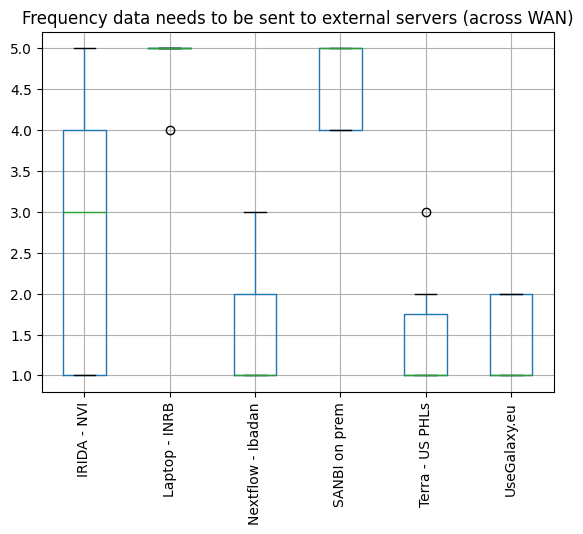

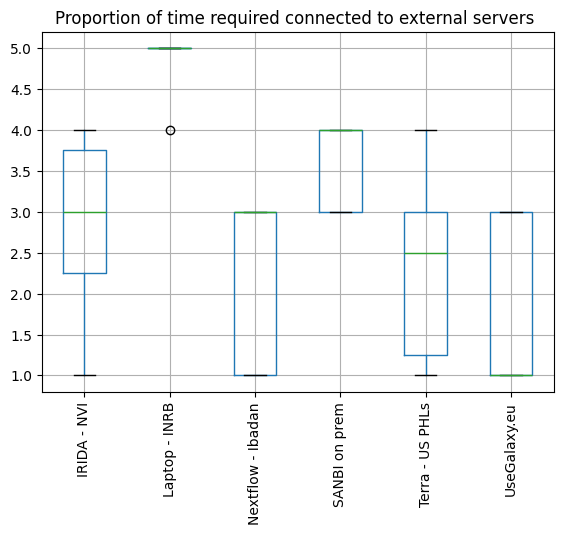

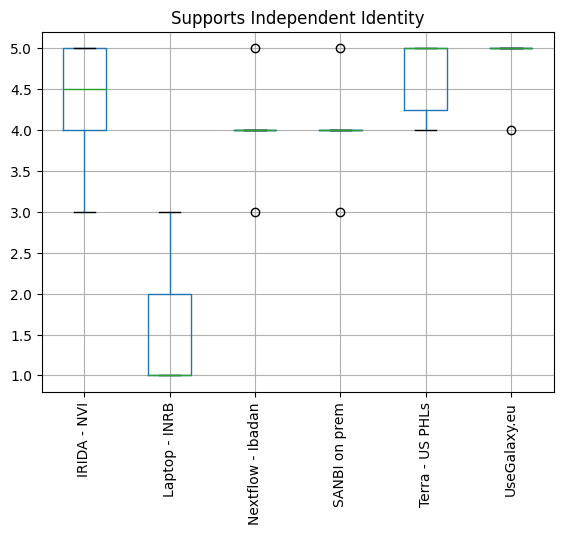

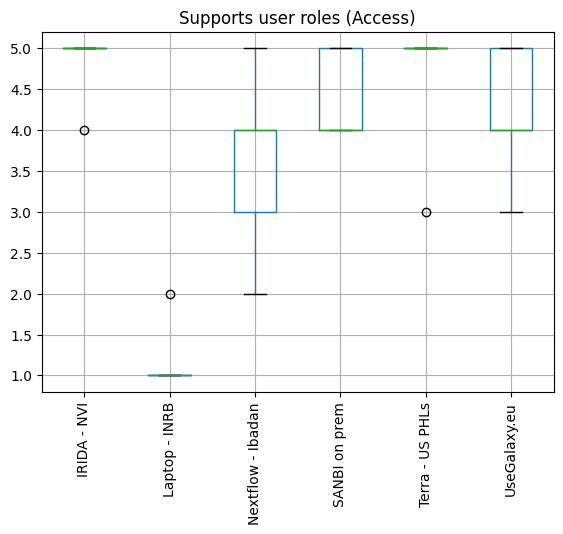

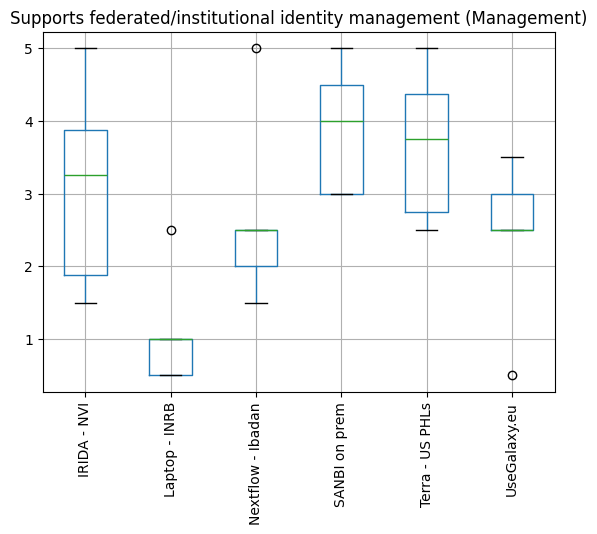

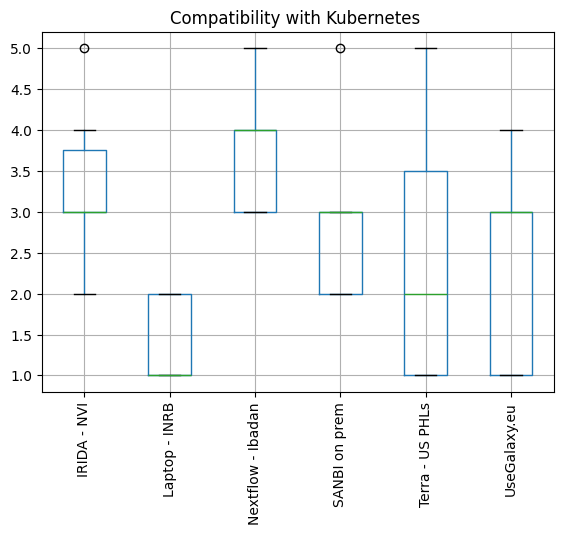

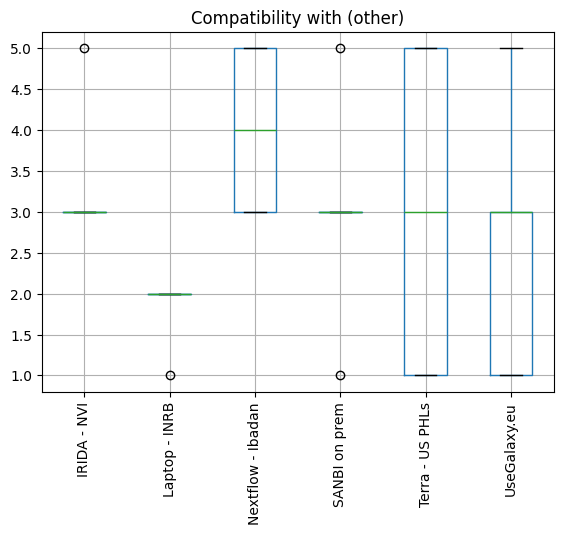

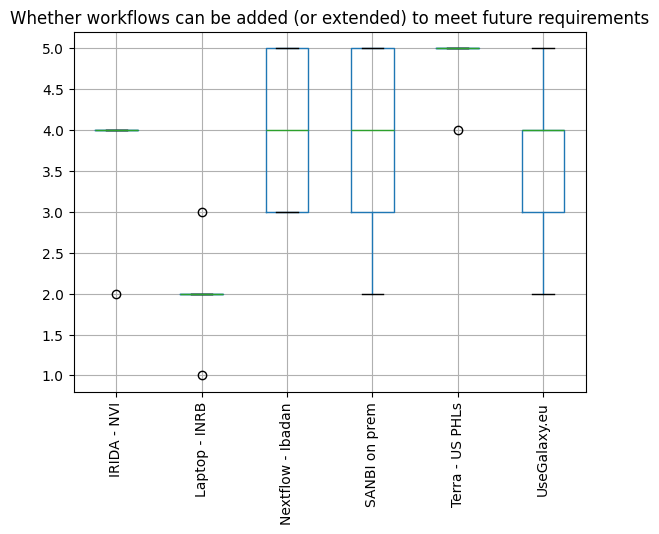

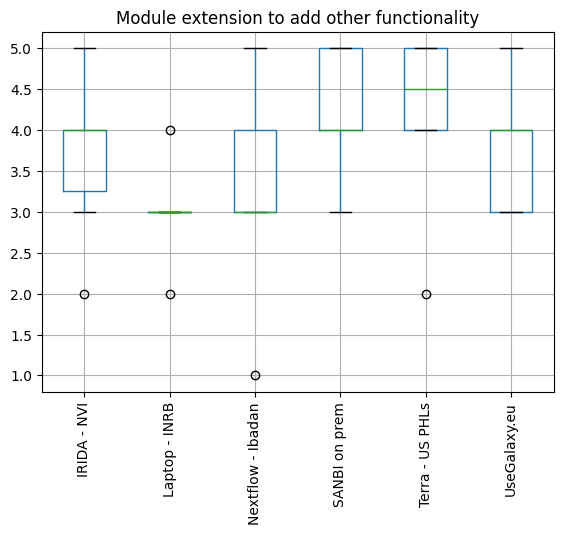

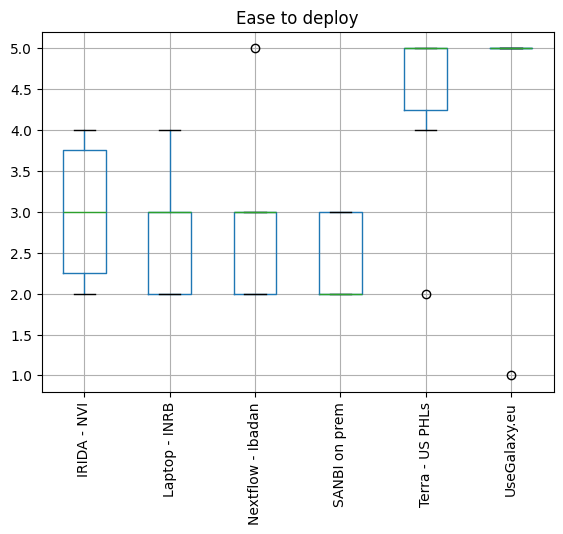

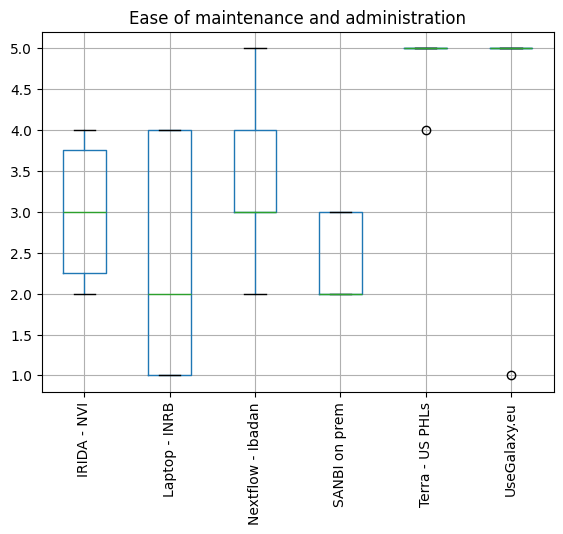

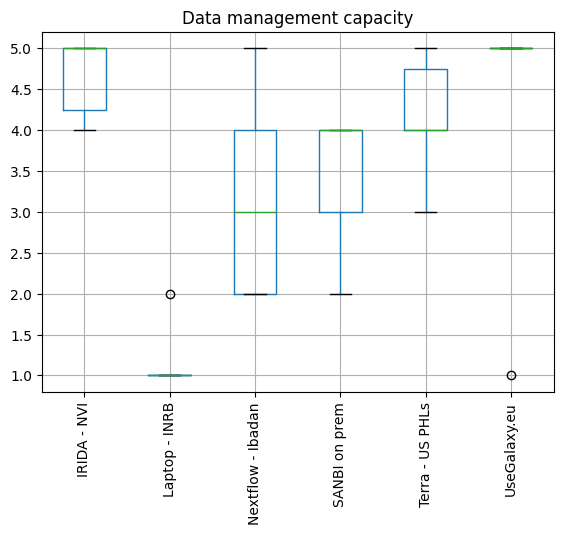

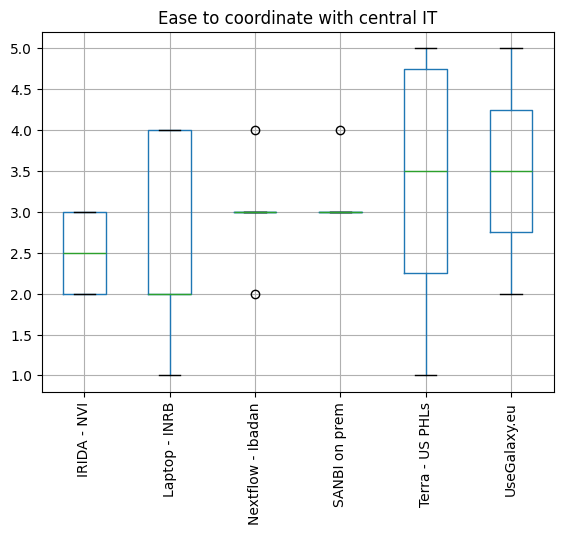

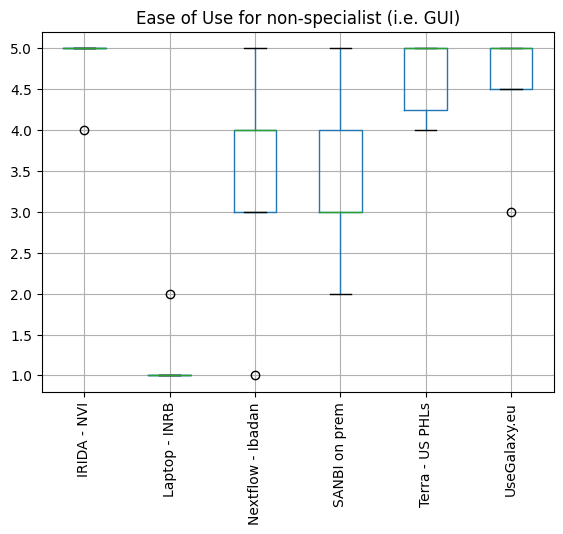

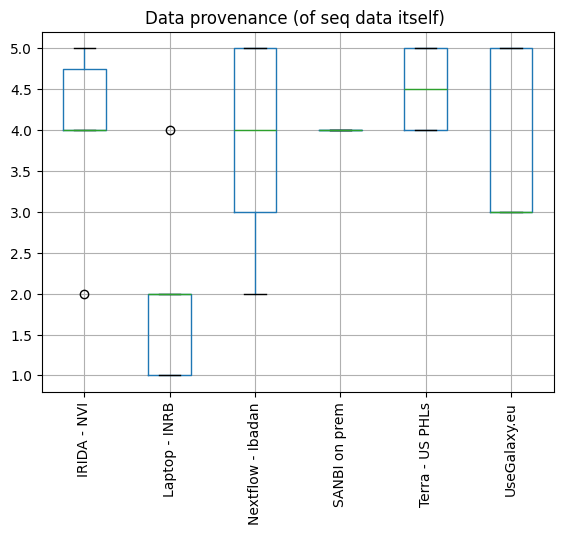

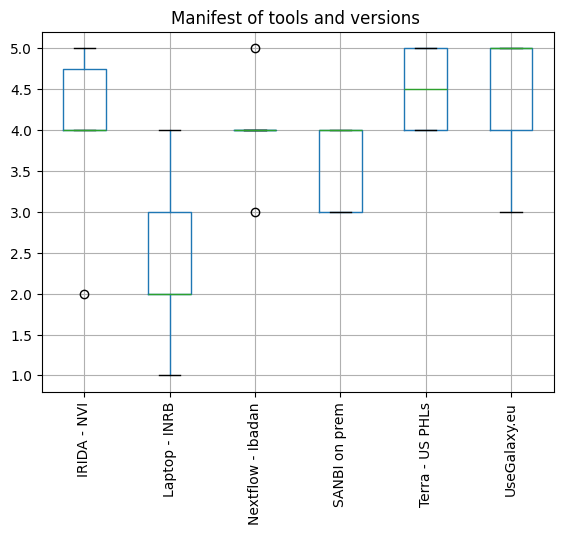

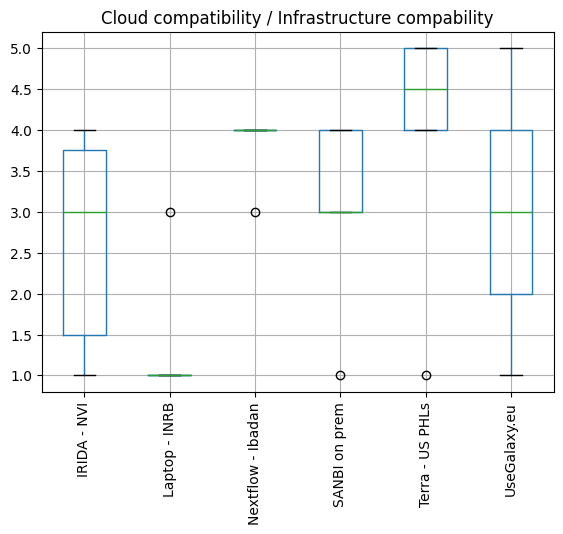

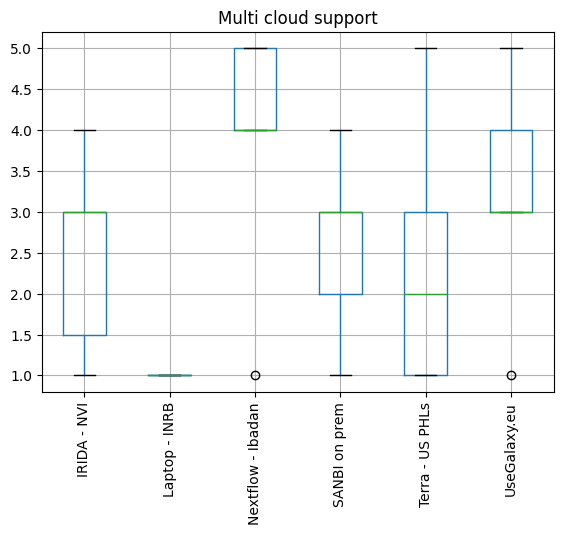

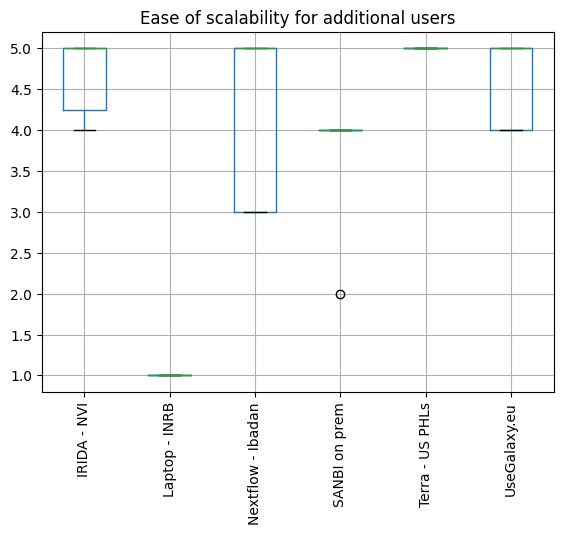

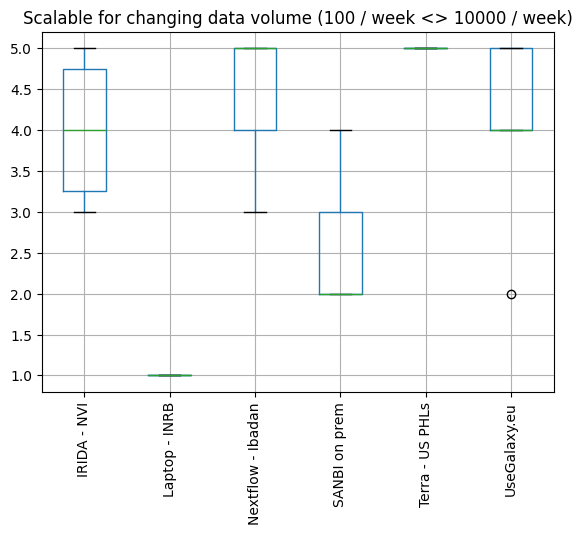

In [10]:
for col in plot_questions:
  df = df_cleaned[["Which vignette are you assessing?", col]]
  df_filter = df.loc[df[col] != ""] # Get rid of null rows.

  ax = df_filter.boxplot(by="Which vignette are you assessing?", column=[col], rot=90)
  ax.set_title(col);
  plt.suptitle('')
  ax.set_xlabel("");

## Merged categories

TO DO: More description here of how we merged survey questions together to a smaller number of axes to plot.

In [11]:
# Create summary scores that merge responses from similar survey questions

score_pooling = { "External acccess requirements": ["Frequency data needs to be sent to external servers (across WAN)", "Proportion of time required connected to external servers "],
  "Access control": ["Supports Independent Identity", "Supports user roles (Access)", "Supports federated/institutional identity management (Management)"],
  "Flexibility": ["Compatibility with Kubernetes\t", "Compatibility with (other)", "Multi cloud support", "Cloud compatibility / Infrastructure compability"],
  "Future proofing": ["Whether workflows can be added (or extended) to meet future requirements", "Module extension to add other functionality"],
  "Ease of use (for administrator)": ["Ease to deploy", "Ease of maintenance and administration", "Ease to coordinate with central IT"],
  "Ease of use (for user)": ["Ease of Use for non-specialist (i.e. GUI)"],
  "Data provenance and management": ["Data management capacity", "Data provenance (of seq data itself) ", "Manifest of tools and versions "],
  "Scalability": ["Ease of scalability for additional users", "Scalable for changing data volume (100 / week <> 10000 / week)"]
}

In [12]:
# merge down related questions

merged_results = {}

for row in df_cleaned.to_dict(orient='records'):
  vig = row['Which vignette are you assessing?']
  for col, value in row.items():
    col_pool = [key for key, value in score_pooling.items() if col in value]
    if col_pool and value:
      col_pool_name = col_pool[0]
      if merged_results.get(col_pool_name):
        if merged_results[col_pool_name].get(vig):
          merged_results[col_pool_name][vig].append(value)
        else:
          merged_results[col_pool_name][vig] = [value]
      else:
        merged_results[col_pool_name] = {}
        merged_results[col_pool_name][vig] = [value]

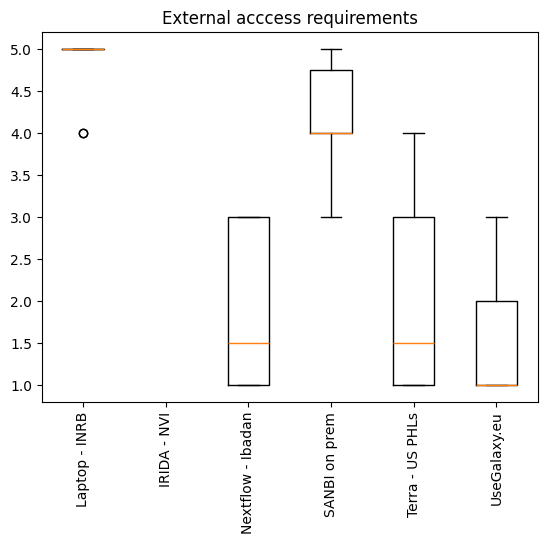

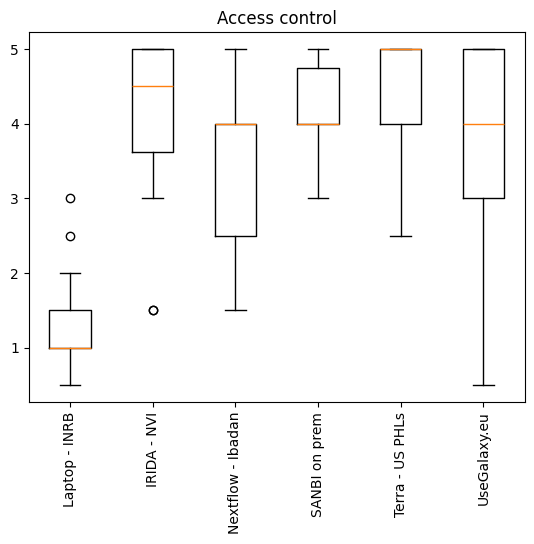

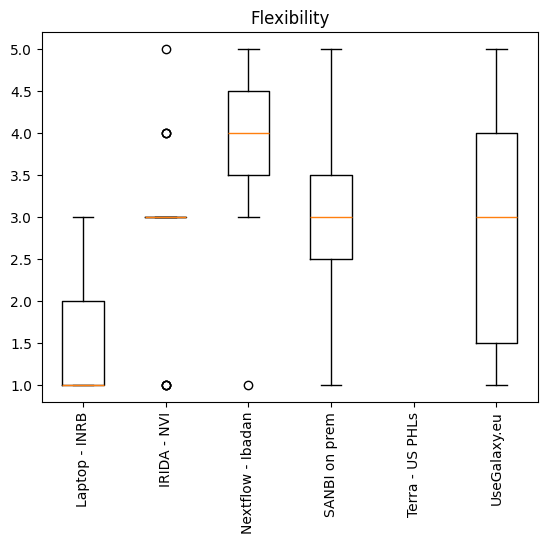

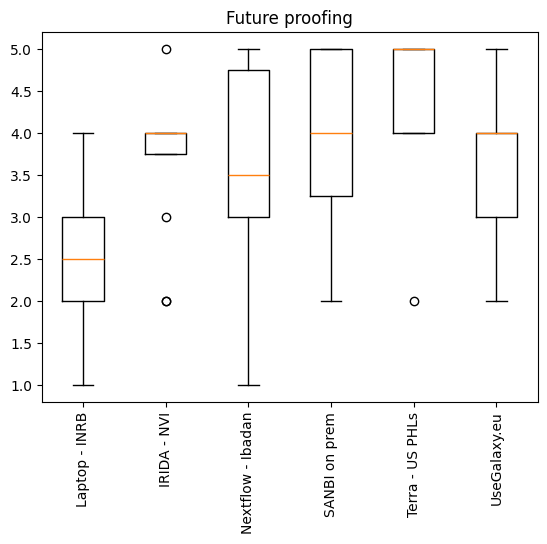

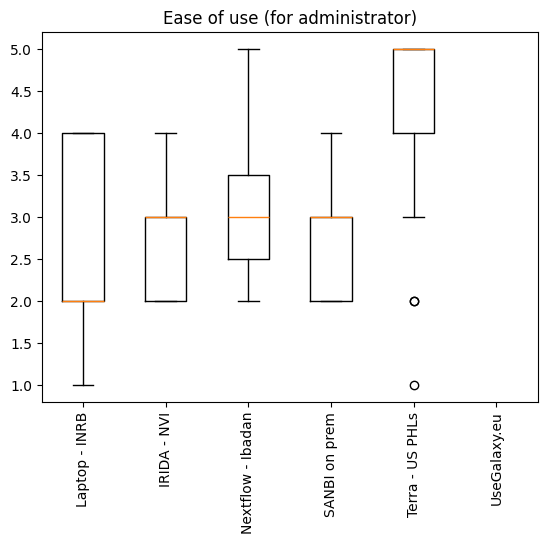

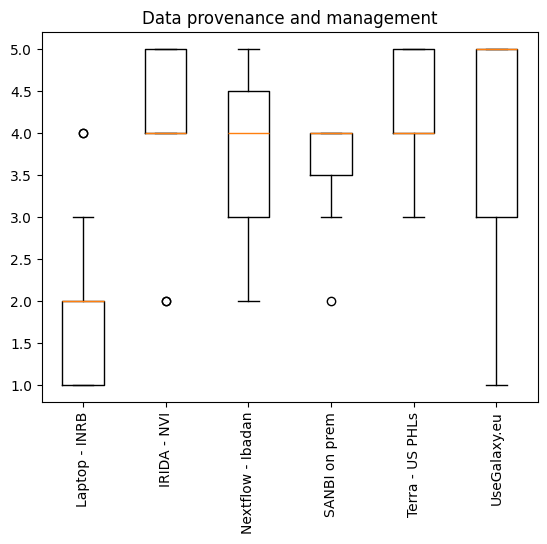

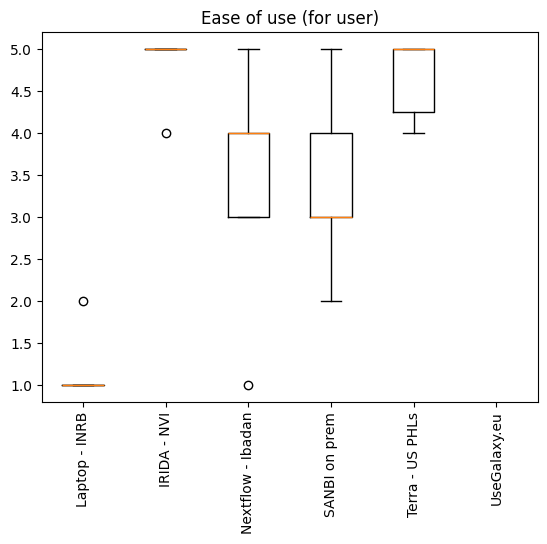

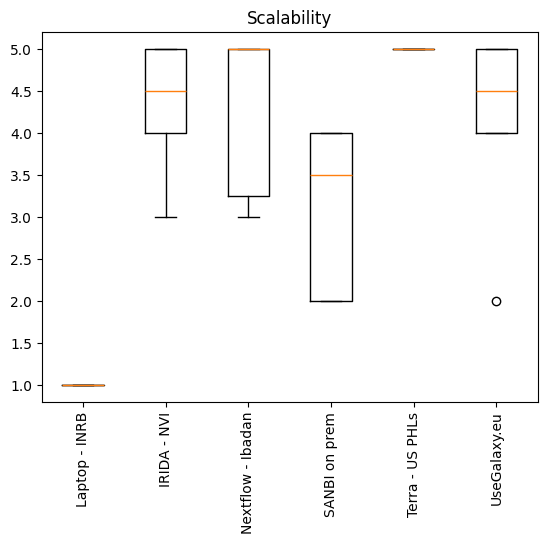

In [13]:
# render via matplotlib

for plot_name, data in merged_results.items():
  labels, pdata = [*zip(*data.items())]
  plt.boxplot(pdata)
  plt.title(plot_name)
  plt.xticks(range(1, len(labels) + 1), labels)
  plt.xticks(rotation=90)
  plt.show()

In [14]:
# fig attempt 1

categories = list(merged_results.keys() )
# order categories

categories = ['External acccess requirements',
              'Flexibility',
              'Scalability',
              'Future proofing',
              'Access control',
              'Data provenance and management',
              'Ease of use (for administrator)',
              'Ease of use (for user)',
              ]
categories.reverse()
fig = go.Figure()

valid_vigs = list(merged_results['External acccess requirements'].keys())
#Order the vigs:
valid_vigs = ['Terra - US PHLs', 'UseGalaxy.eu', 'Nextflow - Ibadan',  'IRIDA - NVI',  'SANBI on prem', 'Laptop - INRB', ]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]  # have 10 here but only use 6

for count, vig in enumerate(valid_vigs):
  # values = [statistics.mean(filtered_results[cat][vig]) for cat in categories ]
  # fig.add_trace(go.Scatterpolar(
  #       r=values,
  #       theta=categories,
  #       name=vig,
  #     #  mode='none',
  #       fill='none',
  # ))
  print(vig, colors[count])
  fig.add_trace(
      px.line_polar(
          pd.DataFrame(dict(values=[statistics.mean(merged_results[cat][vig]) for cat in categories], categories=categories)),
          r='values',
          theta='categories',
          line_close=True,
          markers=True
      ).data[0].update(line_color=colors[count],  showlegend = True)
  )
fig.show()

Terra - US PHLs #1f77b4
UseGalaxy.eu #ff7f0e
Nextflow - Ibadan #2ca02c
IRIDA - NVI #d62728
SANBI on prem #9467bd
Laptop - INRB #8c564b


In [15]:
# fig attempt 2

# Define categories and valid_vigs
categories = [
    'External acccess requirements',
    'Flexibility',
    'Scalability',
    'Future proofing',
    'Access control',
    'Data provenance and management',
    'Ease of use (for administrator)',
    'Ease of use (for user)',
]
categories.reverse()

# Initialize the plotly figure
fig = go.Figure()

valid_vigs = ['Terra - US PHLs', 'UseGalaxy.eu', 'Nextflow - Ibadan',  'IRIDA - NVI',  'SANBI on prem', 'Laptop - INRB', ]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Loop through valid_vigs and add traces with proper legend settings
for count, vig in enumerate(valid_vigs):
    # Data for the polar plot
    data = {
        'values': [statistics.mean(merged_results[cat][vig]) for cat in categories],
        'categories': categories
    }

    # Create a polar line plot
    trace = px.line_polar(
        pd.DataFrame(data),
        r='values',
        theta='categories',
        line_close=True,
        markers=True
    ).data[0]

    # Update trace with proper legend name, color, and showlegend set to True
    trace.update(
        line_color=colors[count],
        name=vig,  # Explicitly set the name for the legend
        showlegend=True  # Ensure it's displayed in the legend
    )

    # Add the trace to the figure
    fig.add_trace(trace)

# Show the plot
fig.show()


In [16]:
# fig attempt 3

categories = list(merged_results.keys() )
# order categories

categories = ['External acccess requirements',
              'Flexibility',
              'Scalability',
              'Future proofing',
              'Access control',
              'Data provenance and management',
              'Ease of use (for administrator)',
              'Ease of use (for user)',
              ]
categories.reverse()
fig = go.Figure()

valid_vigs = list(merged_results['External acccess requirements'].keys())
#Order the vigs:
valid_vigs = ['Terra - US PHLs', 'UseGalaxy.eu', 'Nextflow - Ibadan',  'IRIDA - NVI',  'SANBI on prem', 'Laptop - INRB', ]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]  # have 10 here but only use 6

for count, vig in enumerate(valid_vigs):
  # values = [statistics.mean(filtered_results[cat][vig]) for cat in categories ]
  # fig.add_trace(go.Scatterpolar(
  #       r=values,
  #       theta=categories,
  #       name=vig,
  #     #  mode='none',
  #       fill='none',
  # ))
  print(vig, colors[count])
  fig.add_trace(
      px.line_polar(
          pd.DataFrame(dict(values=[statistics.mean(merged_results[cat][vig]) for cat in categories], categories=categories)),
          r='values',
          theta='categories',
          line_close=True,
          markers=True
      ).data[0].update(line_color=colors[count],  showlegend = True)
  )
fig.show()

#fig.write_image("rader.svg")
#fig.write_image("rader.png")

Terra - US PHLs #1f77b4
UseGalaxy.eu #ff7f0e
Nextflow - Ibadan #2ca02c
IRIDA - NVI #d62728
SANBI on prem #9467bd
Laptop - INRB #8c564b
